<a href="https://colab.research.google.com/github/Teaganstmp/Langlearning/blob/main/Accessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accessing data in Python

This notebook is going to be a collection of different techniques for accessing data from Python. We are going to talk about:
* basic functions for opening and accessing data stored in files
* some preprocessing techniques
* the pandas package, which lets you access spreadsheet data
* different text encodings

# Accessing files in Python
## Reading files

Accessing files in Python is relatively easy. Here is how to do it.

As an example of a file to read, we will use a relatively small, unannotated corpus from Project Gutenberg, http://www.gutenberg.org/wiki/Main_Page
Project Gutenberg is an online collection of texts whose copyright has expired. It contains texts in many languages.

We will work with the Three Musketeers by Alexandre Dumas. We first obtain the file:

In [ ]:
!wget https://www.gutenberg.org/files/1257/1257-0.txt

--2024-09-17 16:28:51--  https://www.gutenberg.org/files/1257/1257-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1388685 (1.3M) [text/plain]
Saving to: ‘1257-0.txt’

1257-0.txt          100%[===================>]   1.32M  6.18MB/s    in 0.2s    

2024-09-17 16:28:52 (6.18 MB/s) - ‘1257-0.txt’ saved [1388685/1388685]



This results in you having a file called 1257-0.txt in the same directory as this notebook. The package `os` lets you check that the file is there:

In [ ]:
import os

if os.path.exists("1257-0.txt"):
    print("We're set, file 1257-0.txt is present.")
else:
    print("Did not find the file 1257-0.txt.")

We're set, file 1257-0.txt is present.


Now we can access the file. We read the very first line:

In [ ]:
with open("1257-0.txt") as f:
    textline = f.readline()
    print(textline)

﻿The Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père



`open("1257-0.txt")` is a Python command. The function `open` takes as its argument a file name, which may include directory information.

It returns an object, which we have stored in the variable `f`. This object functions as a kind of "bookmark" into the file. When we first open it, the bookmark is at the beginning of the file, which is why, when we use the object's method `readline()`, we get the very first line of the file.

The file remains *open* (accessible) throughout the indented block after `with`. As you exit the block, the file is *closed*, and you can no longer access it.

Let's look at the type of data that the object in `f` is:

In [ ]:
with open("1257-0.txt") as f:
    print("f is an object of type", type(f))

f is an object of type <class '_io.TextIOWrapper'>


If you call it `readline()` repeatedly, it keeps reading the next line, and the next after that: The "bookmark" object that is `f` keeps advancing through the file.

In [ ]:
with open("1257-0.txt") as f:
    textline = f.readline()
    print(textline)
    textline = f.readline()
    print(textline)
    textline = f.readline()
    print(textline)


﻿The Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père



This eBook is for the use of anyone anywhere in the United States and



The object in `f` is an iterable: You can iterate through the lines of the file with a for-loop.

In the demo, I've kept a counter and broken the loop after a few lines, so we don't get too much output.

In [ ]:

with open("1257-0.txt") as f:
    linecounter = 0
    for line in f:
        # each line that we read ends with a newline.
        # the print() command by default adds its own newline at the end.
        # so let's keep print() from doing that,
        # so we don't see two newlines at the end of each line
        print(line, end = "")

        # let's stop printing after 20 lines
        linecounter += 1
        if linecounter > 20:
            break


﻿The Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Three Musketeers

Author: Alexandre Dumas, Père

Release Date: March 01, 1998 [eBook #1257]
[Most recently updated: June 28, 2023]

Language: English

Produced by: John P. Roberts III, Roger Labbe, Scott David Gray, Sue Asscher, Anita Martin, David Muller and David Widger



If you are certain that the file does not contain a whole lot of data, you can also read the whole file into a single string variable, like this:

In [ ]:
with open("1257-0.txt") as f:
    wholetext = f.read()

len(wholetext)

1317148

##  Writing files

Here is how you write to a file in Python. Again, we make a file object with “open”. Only this time we give two arguments.
The second one is “w” for “write”. (There is also "a" for append. While "w" overwrites whatever was in the file before, "a" attaches new material to the end.)

 So we have to decide at the time when we open a file whether we want to read it or write to it. You then write into the file using the "print" command, but with the additional parameter ``file = f``.

In [ ]:
# This following command makes a file named 'myoutfile.txt'
# in the directory where the colab notebook is.
# I chose to name it '.txt', I could also have chosen
# another extension, but .txt is good because it's plain text.
with open("myoutfile.txt", "w") as outf:

    # We use the "print" command to write to a file, but with the additional
    # parameter file=outf.
    # Note that outf is the variable in which we put the file object.
    # If I had named the file object "bob",
    # it would have been "print(..., file = bob)"

    print("Hello", file=outf)
    print("Writing another line to the file.", file = outf)
    print("Here’s a number:", 5, file= outf)



Is the file there now?

In [ ]:
if os.path.exists("myoutfile.txt"):
    print("myoutfile.txt exists now.")
else:
    print("myoutfile.txt not found")

myoutfile.txt exists now.


In [ ]:
# and we can read its content back in
with open("myoutfile.txt") as f:
    contents = f.read()
    print(contents)

Hello
Writing another line to the file.
Here’s a number: 5



## Accessing multiple files

Your data will often come in multiple files. Here are ways to access it.

First, we need some example data. Here is some code that makes a few directories and makes a few files in them -- feel free not to delve into the details of this.

In [ ]:
import os

# making some directories
if not os.path.exists("testdir"):
    os.makedirs("testdir")
if not os.path.exists("testdir/d1"):
    os.makedirs("testdir/d1")
if not os.path.exists("testdir/d2"):
    os.makedirs("testdir/d2")
if not os.path.exists("testdir/d2/d21"):
    os.makedirs("testdir/d2/d21")
# making some files
filenames = ["testdir/01.txt", "testdir/02.txt", "testdir/d1/11.txt",
             "testdir/d2/21.txt", "testdir/d2/22.txt", "testdir/d2/d21/211.txt"]
index = 0
for fname in filenames:
    with open(fname, "w") as outf:
        print("a" + str(index), file= outf)
        index += 1


Now we are ready to access multiple files. First, let's access all files in the new directory "testdir" -- there should be two of them, named 01.txt and 02.txt. We use `os.listdir` for this. As you see, this returns the contents of the directory, filenames as well as subdirectories.

In [ ]:
import os

directoryname = "testdir"

# show contents of this directory
print("Contents of the directory:", os.listdir(directoryname))

# iterate over contents of the directory
for entry in os.listdir(directoryname):
    # the full name of this entry is
    # directoryname plus name of this entry
    full_name = os.path.join(directoryname, entry)
    # is this a file, rather than a directory?
    if os.path.isfile(full_name):
        # yes, this is a file. read it.
        with open(full_name) as f:
            # we read the file contents in one go,
            # and print them
            # -- but only because we know there's very little in these files!
            contents = f.read()
            print("contents of", entry, ":", contents)

Contents of the directory: ['02.txt', 'd2', 'd1', '01.txt']
contents of 02.txt : a1

contents of 01.txt : a0



When you have a deeper structure with directories and subdirectories and sub-subdirectories, with files in all of them, there is another function that is useful to access all of the files, across all the directories and subdirectories:

In [ ]:
import os

starting_directoryname = "testdir"

# os.walk iterates over triples (3-tuples) of items
# The first is the name of a directory,
# the second is a list of names of all its subdirectories,
# the third is a list of names of all files in this directory
for directoryname, subdirs, filenames in os.walk(starting_directoryname):
    print("Directory:", directoryname, "subdirectories:", subdirs, "files:", filenames)


Directory: testdir subdirectories: ['d2', 'd1'] files: ['02.txt', '01.txt']
Directory: testdir/d2 subdirectories: ['d21'] files: ['21.txt', '22.txt']
Directory: testdir/d2/d21 subdirectories: [] files: ['211.txt']
Directory: testdir/d1 subdirectories: [] files: ['11.txt']


In [ ]:
# reading all the files in all these directories:
# iterating over all directories and their contents
for directoryname, subdirs, filenames in os.walk(starting_directoryname):
    # iterating over the files in the current directories
    for filename in filenames:
        # the full name of this entry is
        # directoryname plus name of this entry
        full_name = os.path.join(directoryname, filename)
        with open(full_name) as f:
            # we read the file contents in one go,
            # and print them
            # -- but only because we know there's very little in these files!
            contents = f.read()
            print("contents of", filename, "in", directoryname, ":", contents)

contents of 02.txt in testdir : a1

contents of 01.txt in testdir : a0

contents of 21.txt in testdir/d2 : a3

contents of 22.txt in testdir/d2 : a4

contents of 211.txt in testdir/d2/d21 : a5

contents of 11.txt in testdir/d1 : a2



# Some preprocessing techniques

## Preprocessing methods available in the NLTK

The Natural Language Toolkit comes with several preprocessing methods, though as far as I know, mostly for English.

As a reminder, `word_tokenize()` splits a string of text into words, where punctuation symbols are split off into separate tokens. We apply it to the opening stanza of Lewis Carroll's "Hunting of the Snark":

In [ ]:
import nltk
nltk.download("punkt")

stanza = """ "Just the place for a Snark!" the Bellman cried,
   As he landed his crew with care;
Supporting each man on the top of the tide
   By a finger entwined in his hair."""
nltk.word_tokenize(stanza)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['``',
 'Just',
 'the',
 'place',
 'for',
 'a',
 'Snark',
 '!',
 "''",
 'the',
 'Bellman',
 'cried',
 ',',
 'As',
 'he',
 'landed',
 'his',
 'crew',
 'with',
 'care',
 ';',
 'Supporting',
 'each',
 'man',
 'on',
 'the',
 'top',
 'of',
 'the',
 'tide',
 'By',
 'a',
 'finger',
 'entwined',
 'in',
 'his',
 'hair',
 '.']

Stopwords are frequent words that are often excluded from text analysis. The Natural Language Toolkit comes with stopword lists for several languages. Here is how you obtain the one for English:

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:20]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

The usual use for stopwords is to tokenize your text into a list of words, then remove the words that are also on the stopwords list.

The Natural Language Toolkit also contains a part-of-speech tagger for English. Here is an example of how it works:

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
words = nltk.word_tokenize(stanza)
nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('``', '``'),
 ('Just', 'RB'),
 ('the', 'DT'),
 ('place', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('Snark', 'NN'),
 ('!', '.'),
 ("''", "''"),
 ('the', 'DT'),
 ('Bellman', 'NNP'),
 ('cried', 'VBD'),
 (',', ','),
 ('As', 'IN'),
 ('he', 'PRP'),
 ('landed', 'VBD'),
 ('his', 'PRP$'),
 ('crew', 'NN'),
 ('with', 'IN'),
 ('care', 'NN'),
 (';', ':'),
 ('Supporting', 'VBG'),
 ('each', 'DT'),
 ('man', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('top', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('tide', 'NN'),
 ('By', 'IN'),
 ('a', 'DT'),
 ('finger', 'NN'),
 ('entwined', 'VBN'),
 ('in', 'IN'),
 ('his', 'PRP$'),
 ('hair', 'NN'),
 ('.', '.')]

This part-of-speech tagger uses the Penn Treebank set of tags, which is widely used. Here is a list of all the tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

The tags are quite fine-grained, distinguishing for example a singular noun (NN) from a plural noun (NNS), a proper noun (NNP) and a plural proper noun (NNPS). Likewise, there is a tag for verbs in their base form (VB), third person singular (VBZ), gerund (VBG), past tense (VBD), and past participle (VBN). But you may notice that all noun tags started with "NN", and all verb tags with "VB". This is a design feature of the Penn tagset: They use fine-grained tags, but if you only look at the first two letters of each tag, you get coarse-grained tags.

For more information on part-of-speech tagging, see the NLTK book: https://www.nltk.org/book_1ed/ch05.html


The NLTK part-of-speech tagger looks at words *in context*. Here is an example of two sentences, one with "object" as a verb and one with "object" as a noun. As you can see, the two get tagged differently:

In [ ]:
words = nltk.word_tokenize("I want to object")
nltk.pos_tag(words)

[('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('object', 'VB')]

In [ ]:
words = nltk.word_tokenize("I found an object")
nltk.pos_tag(words)

[('I', 'PRP'), ('found', 'VBD'), ('an', 'DT'), ('object', 'NN')]

## Preprocessing text using spaCy

The Python package spaCy offers models for automatically processing text in several languages: for part-of-speech tagging, lemmatization, syntactic analysis, and other types of analysis. Here is the link to the documentation: https://spacy.io/

In order to use spaCy, you first have to download a model containing the relevant knowledge about the language you want to process. Here is how to download a model for English. It is the small model (hence the "sm").

In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Now let's process some text. This is from the wikipedia page about Axolotls, https://en.wikipedia.org/wiki/Axolotl

In [ ]:
import spacy

spacy_obj = spacy.load("en_core_web_sm")

text = "The feature of the axolotl that attracts most attention is its healing ability: the axolotl does not heal by scarring and is capable of the regeneration of entire lost appendages in a period of months, and, in certain cases, more vital structures, such as tail, limb, central nervous system, and tissues of the eye and heart."
processed = spacy_obj(text)

type(processed)

spacy.tokens.doc.Doc

This is an object from a class defined by spaCy. When we iterate over it, we can access individual tokens. Here is the word, lemma, and POS for each token. Each token is again an object, of type `spacy.tokens.token.Token`.

In [ ]:
for token in processed:
    print("word:", token.text, "lemma:", token.lemma_, "POS:", token.pos_)

word: The lemma: the POS: DET
word: feature lemma: feature POS: NOUN
word: of lemma: of POS: ADP
word: the lemma: the POS: DET
word: axolotl lemma: axolotl POS: NOUN
word: that lemma: that POS: PRON
word: attracts lemma: attract POS: VERB
word: most lemma: most POS: ADJ
word: attention lemma: attention POS: NOUN
word: is lemma: be POS: AUX
word: its lemma: its POS: PRON
word: healing lemma: healing POS: NOUN
word: ability lemma: ability POS: NOUN
word: : lemma: : POS: PUNCT
word: the lemma: the POS: DET
word: axolotl lemma: axolotl POS: NOUN
word: does lemma: do POS: AUX
word: not lemma: not POS: PART
word: heal lemma: heal POS: VERB
word: by lemma: by POS: ADP
word: scarring lemma: scar POS: VERB
word: and lemma: and POS: CCONJ
word: is lemma: be POS: AUX
word: capable lemma: capable POS: ADJ
word: of lemma: of POS: ADP
word: the lemma: the POS: DET
word: regeneration lemma: regeneration POS: NOUN
word: of lemma: of POS: ADP
word: entire lemma: entire POS: ADJ
word: lost lemma: lose P

But the object contains more: It also has a dependency parse. Here is how to access it. As you can see, if `token` is a `spacy.tokens.token.Token`, then `token.head` is again a `spacy.tokens.token.Token`, the token that is the head word.

In [ ]:
for token in processed:
    print("id:", token.idx, "word:", token.text, "deprel:", token.dep_, "head ID:", token.head.idx, "headword:", token.head.text)

id: 0 word: The deprel: det head ID: 4 headword: feature
id: 4 word: feature deprel: nsubj head ID: 56 headword: is
id: 12 word: of deprel: prep head ID: 4 headword: feature
id: 15 word: the deprel: det head ID: 19 headword: axolotl
id: 19 word: axolotl deprel: pobj head ID: 12 headword: of
id: 27 word: that deprel: nsubj head ID: 32 headword: attracts
id: 32 word: attracts deprel: relcl head ID: 19 headword: axolotl
id: 41 word: most deprel: amod head ID: 46 headword: attention
id: 46 word: attention deprel: dobj head ID: 32 headword: attracts
id: 56 word: is deprel: ccomp head ID: 101 headword: heal
id: 59 word: its deprel: poss head ID: 71 headword: ability
id: 63 word: healing deprel: compound head ID: 71 headword: ability
id: 71 word: ability deprel: attr head ID: 56 headword: is
id: 78 word: : deprel: punct head ID: 101 headword: heal
id: 80 word: the deprel: det head ID: 84 headword: axolotl
id: 84 word: axolotl deprel: nsubj head ID: 101 headword: heal
id: 92 word: does deprel:

You can also visualize the dependency tree:

In [ ]:
from spacy import displacy

displacy.render(processed, style="dep", jupyter=True)

For a multi-sentence text, you can iterate over sentences, then iterate over the tokens in each sentence.

In [ ]:
text = "This is a text. It has two sentences."
textprocessed = spacy_obj(text)
for sent in textprocessed.sents:
    for token in sent:
        print((token.text, token.pos_), end = " ")
    print()

('This', 'PRON') ('is', 'AUX') ('a', 'DET') ('text', 'NOUN') ('.', 'PUNCT') 
('It', 'PRON') ('has', 'VERB') ('two', 'NUM') ('sentences', 'NOUN') ('.', 'PUNCT') 


spaCy is not the only option for automatic part-of-speech tagging and syntactic analysis. If you work with a language that is not covered by spaCy, or you don't like what spaCy can do for your text domain, look around for other freely available systems.

# Text encodings

Different languages often use different alphabets. Python can handle different alphabets easily, but you need to pay attention to how your text is *encoded*.

Internally, characters are encoded through character numbers. There are different *encodings* that you can use. Some encodings only have a smaller amount of numbers, and can only encode limited numbers of characters. Others use longer numbers, and hence can encode larger numbers of characters.

Python by default assumes a *UTF-8* encoding, see https://en.wikipedia.org/wiki/UTF-8

This encompasses many languages already, which Python can then display correctly out of the box. If you work with a language whose writing system is not covered by UTF-8, you need to specify the encoding of strings and files explicitly.

For more information, see this tutorial, which does a better job of explaining the intricacies of encoding than I ever could: https://realpython.com/python-encodings-guide/


# A few basics about the Python pandas package

Python's `pandas` package lets you read spreadsheets into Python. It has functionality to display and search spreadsheets, as well as some (limited) graphing. In the methods it offers, it mimics R's data frames -- which is good, because it gives yuo an easier way to go back and forth between the two languages.

We'll work with HOW DO YOU GET A SPREADSHEET FROM UTBOX ONTO colab? inaugural.csv

This spreadsheet contains some word counts for US inaugural addresses: the year and the name of the president, the overall word count for each speech, as well as counts for words like "America", "citizens", or "freedom".

Microsoft Excel and Apple's Numbers can both export spreadsheets in the "csv" format. "csv" stands for comma-separated values, because that is what it is: A plain-text file in which each file row corresponds to a spreadsheet row, and columns are separated by commas. Once you have your spreadsheet in this format, reading it into Python is easy:


In [ ]:
!curl -L https://utexas.box.com/shared/static/icka2txuy94ojc6sjkvjcbc4py7s1l6t --output inaugural.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100     4    0     4    0     0      1      0 --:--:--  0:00:02 --:--:--    16
100  2439  100  2439    0     0    623      0  0:00:03  0:00:03 --:--:--     0


In [ ]:
import pandas as pd

df = pd.read_csv("inaugural.csv")
type(df)

pandas.core.frame.DataFrame

Here are a few methods defined for Pandas' DataFrame objects:

In [ ]:
#looking at the top lines of a data frame to get a sense of the data
df.head()

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
0,1,Washington,1789,1538,0,0,5,0,0,23,8,1
1,2,Washington,1793,147,1,0,1,0,0,6,1,0
2,3,Adams,1797,2585,5,1,5,0,0,13,5,1
3,4,Jefferson,1801,1935,0,0,7,0,4,21,4,2
4,5,Jefferson,1805,2384,0,0,10,0,2,18,8,4


In [ ]:
# selecting a column with straight brackets and the name of the
# column as a string. We show the first 10 entries in the
# "president" column
df["president"][:10]

,president
0,Washington
1,Washington
2,Adams
3,Jefferson
4,Jefferson
5,Madison
6,Madison
7,Monroe
8,Monroe
9,Adams


In [ ]:
# we can turn a column in to a list
list(df["president"])[:10]

['Washington',
 'Washington',
 'Adams',
 'Jefferson',
 'Jefferson',
 'Madison',
 'Madison',
 'Monroe',
 'Monroe',
 'Adams']

In [ ]:
# R-like selection of rows:
# we want the rows where the length of the speech
# is more than 5000 words
df[df["length"] > 5000]

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
13,14,Harrison,1841,9165,0,11,27,4,6,45,15,5
14,15,Polk,1845,5196,0,0,11,0,2,24,5,9
30,31,Taft,1909,5846,4,0,6,0,2,32,2,5


<Axes: >

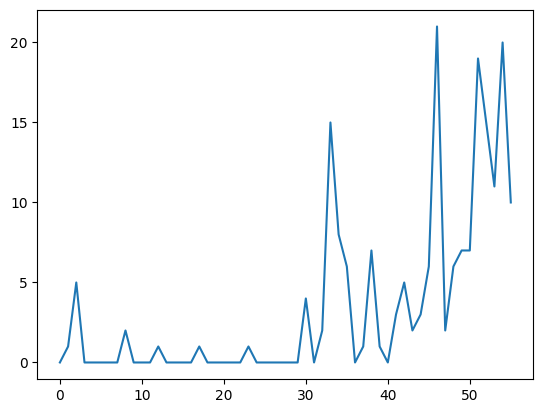

In [ ]:
%matplotlib inline

# graphing:
# counts of "America" as a line graph
df["America"].plot()

<Axes: >

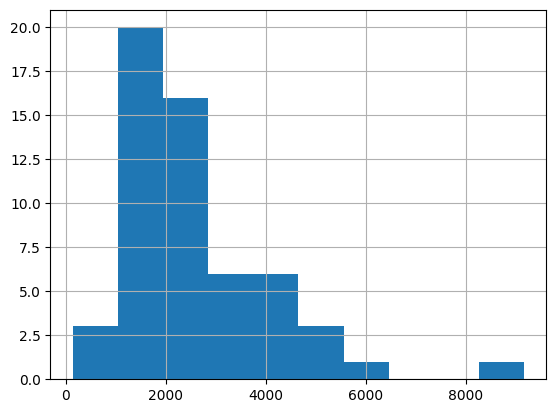

In [ ]:
# lengths of speeches as a histogram
df["length"].hist()

In [ ]:
# iterating through rows of a spreadsheet.
# You can access entries in each row
# in the same way as in a dictionary.
for index, row in df.iterrows():
    print("President:", row["president"], "year:",  row["year"], "counts of 'democracy':", row["democracy"])

President: Washington year: 1789 counts of 'democracy': 0
President: Washington year: 1793 counts of 'democracy': 0
President: Adams year: 1797 counts of 'democracy': 0
President: Jefferson year: 1801 counts of 'democracy': 0
President: Jefferson year: 1805 counts of 'democracy': 0
President: Madison year: 1809 counts of 'democracy': 0
President: Madison year: 1813 counts of 'democracy': 0
President: Monroe year: 1817 counts of 'democracy': 0
President: Monroe year: 1821 counts of 'democracy': 0
President: Adams year: 1825 counts of 'democracy': 1
President: Jackson year: 1829 counts of 'democracy': 0
President: Jackson year: 1833 counts of 'democracy': 0
President: VanBuren year: 1837 counts of 'democracy': 0
President: Harrison year: 1841 counts of 'democracy': 4
President: Polk year: 1845 counts of 'democracy': 0
President: Taylor year: 1849 counts of 'democracy': 0
President: Pierce year: 1853 counts of 'democracy': 0
President: Buchanan year: 1857 counts of 'democracy': 0
Presiden